#  **Final Report**

###  **Introduction**
We are team C&C and we determined the best neighborhood in Pittburgh by analyzing which neighborhood would be the best to live in based on population, homeownership, and crime data. We chose this way to determine the best neighborhood because we are both out-of-state students. We wanted to learn more about what it was like to live here and if some areas are safer than others while also have a good social community. Prior to this metric we also considered basing the best neighborhood off transportation accessibility, shopping availabity, and overall housing values of home in different neighborhoods. It was difficult to find concise data on those topics so we decided to choose the metrics we have now. 

![Pittsburgh Pennsylvania GIF](https://media.giphy.com/media/521OkF6S2yypmXnsI8/giphy.gif)

### **The Metric**
For our analysis we will be using data from the 2020 Pittsburgh Census, Pittsburgh Police Arrest Data, and Pittsburgh Homeowner Housing Values. 

####  - Census Metric
In this metric we will be measuring the total number of residents per neighborhood based on the city data.

![New York People GIF](https://media.giphy.com/media/MTKpZ9rSgYYthtxf4e/giphy.gif)

In [1]:
#import panda and others to let the code run propperly
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Population')

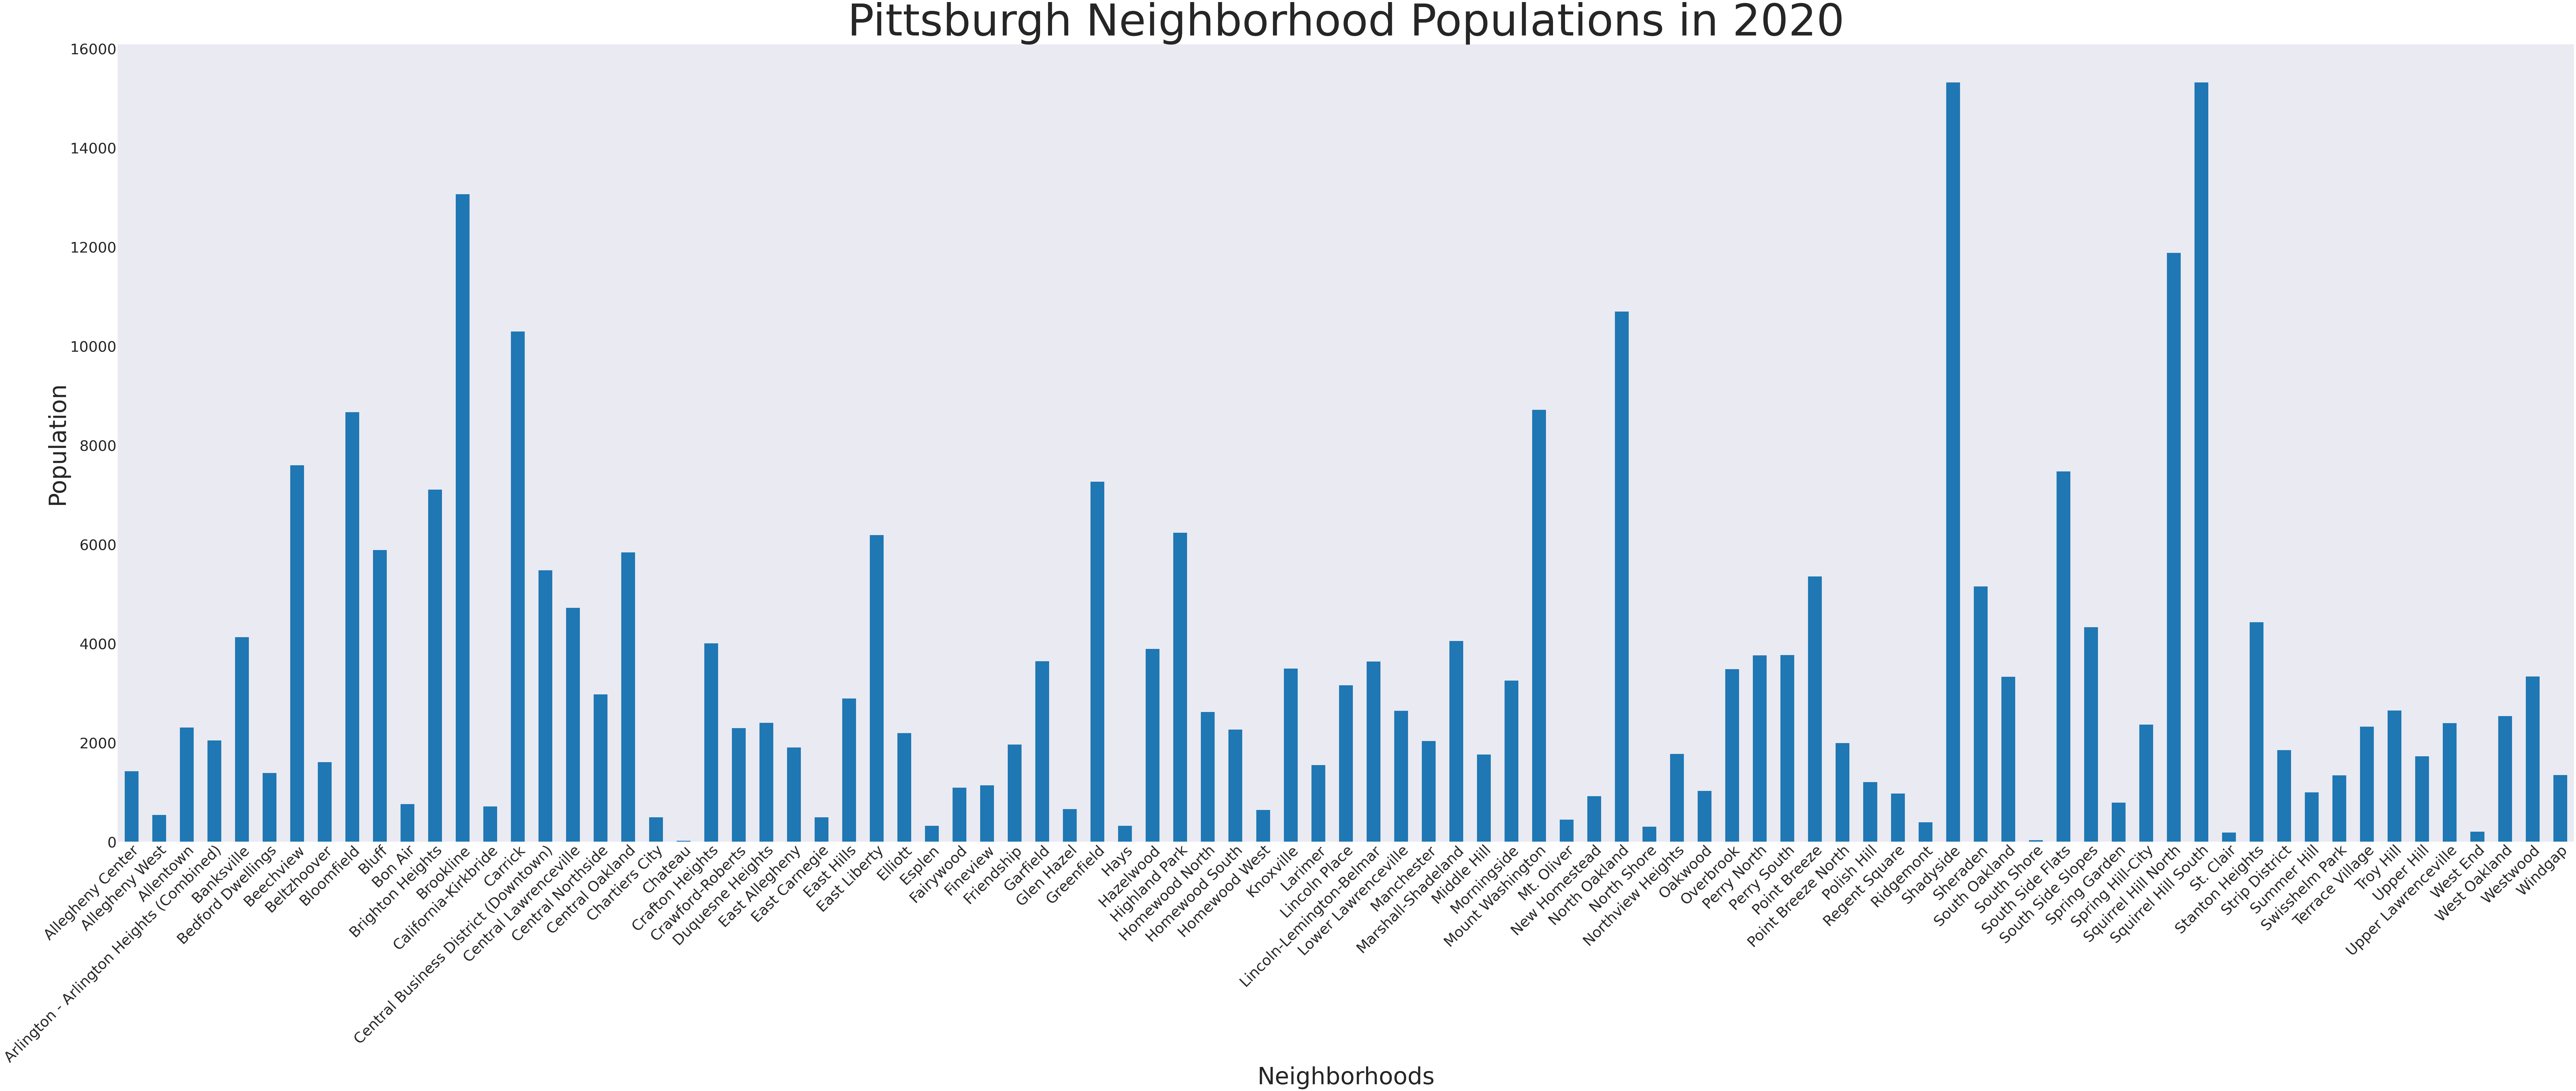

In [11]:
#save the data from the file 
df = pd.read_csv("Neighborhood_Population.csv")

#save the names of all the neighborhoods
neighborhood_names = []
for index, row in df.iterrows():
    name = row['Neighborhood']
    neighborhood_names.append(name)

#save the population data 
neighborhood_pop = []
for index, row in df.iterrows():
    pop = row['2020_Total_Population']
    neighborhood_pop.append(pop)
    
#create a new Series with just the important information
population_df = pd.Series(neighborhood_pop, index = neighborhood_names)

#plot the data in a bar chart 
population_df.plot.bar(figsize=(150,50))
    
#change the xticks and yticks
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor', fontsize=50)
plt.yticks(fontsize = 50)
plt.style.use('seaborn-dark')

#add a title and labels to the graph
plt.title("Pittsburgh Neighborhood Populations in 2020", fontsize=150)
plt.xlabel("Neighborhoods", fontsize=80)
plt.ylabel("Population", fontsize=80)

**Process:** By organizing the data down to focus on the neighborhoods and the population census from 2020 in a series, it was able to be organized in a bar chart for easy, side-by-side comparison.

In [4]:
population_df.sort_values()

Chateau                   19
South Shore               29
St. Clair                183
West End                 205
North Shore              301
                       ...  
North Oakland          10691
Squirrel Hill North    11879
Brookline              13063
Squirrel Hill South    15317
Shadyside              15317
Length: 89, dtype: int64

**Observations:** Based on this data visualization, Shadyside and Squireel Hill South, and Brookline have the largest population, while Chateau and South Shore have the smallest population.

**Best Neighborhood Based off this data:** Shadyside and Squirrel Hill South

#### - Arrest Metric
In this metric we will be measuring the total number of criminal arrests per neighborhood based on police data. 

![Arrest GIF](https://media.giphy.com/media/wqSaEjSBCvwE8/giphy.gif)

Text(0, 0.5, 'Arrests')

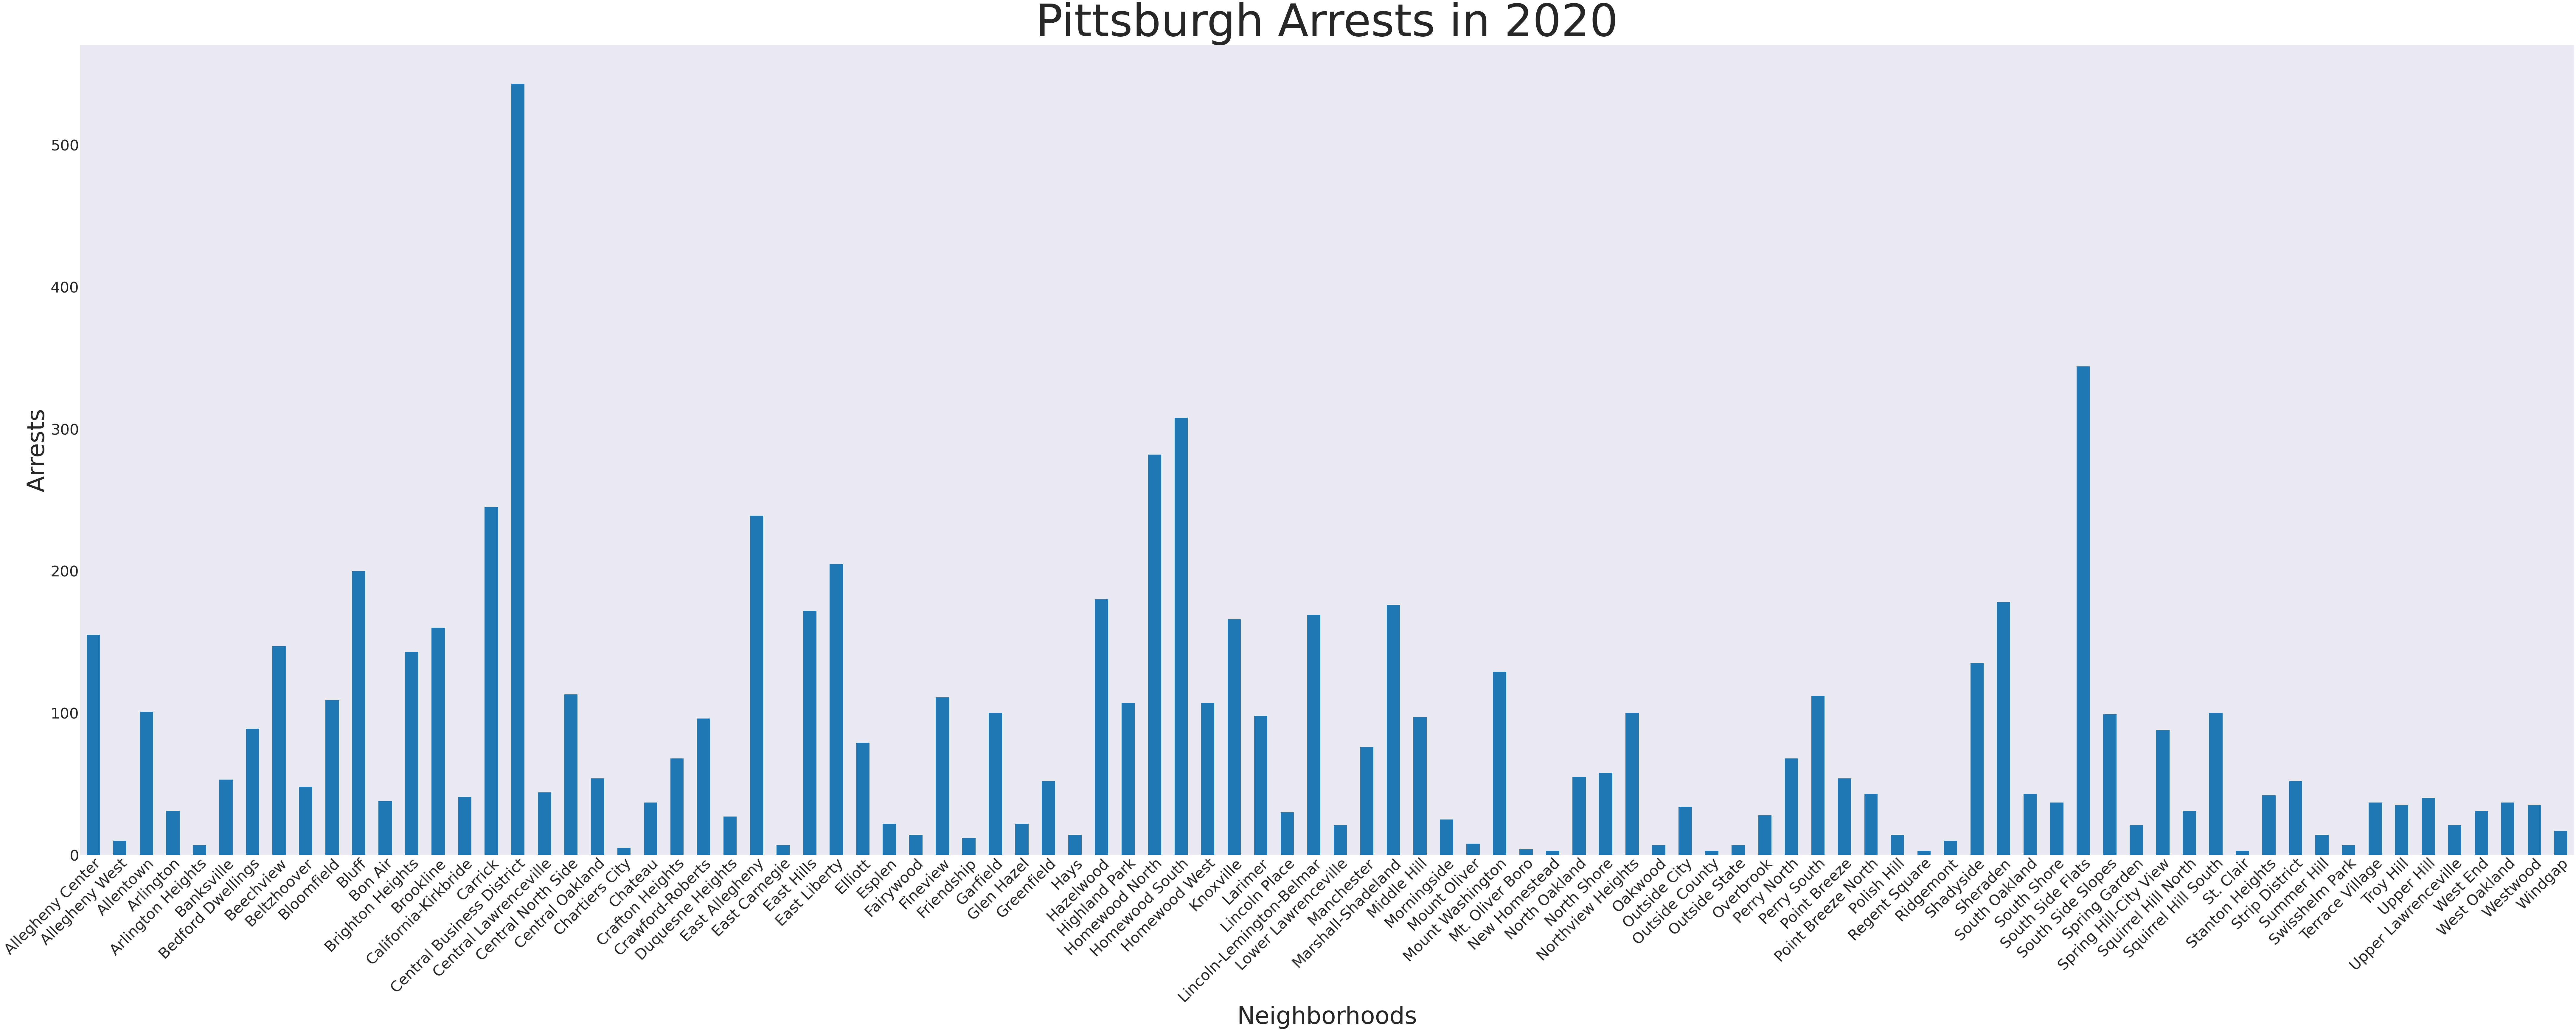

In [5]:
#read in the file
df = pd.read_csv("Arrests.csv")

#seperate the data so it is all 2020 arrests
querymask = df['ARRESTTIME'].str.contains('2020')
arrests = df[querymask]

groups = arrests.groupby(['INCIDENTNEIGHBORHOOD']).size()
#plot the data in a bar chart 
groups.plot.bar(figsize=(150,50))

#change the y and x ticks
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor', fontsize=50)
plt.yticks(fontsize = 50)
plt.style.use('seaborn-dark')

#add a title and labels to the graph
plt.title("Pittsburgh Arrests in 2020", fontsize=150)
plt.xlabel("Neighborhoods", fontsize=80)
plt.ylabel("Arrests", fontsize=80)

**Process:** By organizing the data by neighborhood and grouping the incidents per neighborhood only from 2020 in a mask, it was able to be organized into bar chart for a simple, side-by-side comparison. 

In [6]:
groups.sort_values()

INCIDENTNEIGHBORHOOD
New Homestead                  3
St. Clair                      3
Regent Square                  3
Outside County                 3
Mt. Oliver Boro                4
                            ... 
Carrick                      245
Homewood North               282
Homewood South               308
South Side Flats             344
Central Business District    543
Length: 94, dtype: int64

**Observations:** Based on this data visualization, the Central Businee Distract, Southside Flats, and Homewood South showed to many the most crime issues. On the other hand, New Homestead, St.Clair, Regent Square, and Outside Country had the least amount of crime issues. 
    
**Best Neighborhood based off this metric:** New Homestead, St.Clair, Regent Square, and Outside Country

#### - Homeowner Metric
This metric is from 2014 and surverys homeowners under 25 to over 65 about the estimated value of their homes. The data does address the margin of error as it is survey data and then organizes the data by neighborhood. In this metric we will be measuring the estimate number of homeowners per neighborhood based on the survey data. 

![Wizard of Oz GIF](https://media.giphy.com/media/iFsa7iu1Ajza/giphy.gif)

Text(0, 0.5, 'Number of Home Owners')

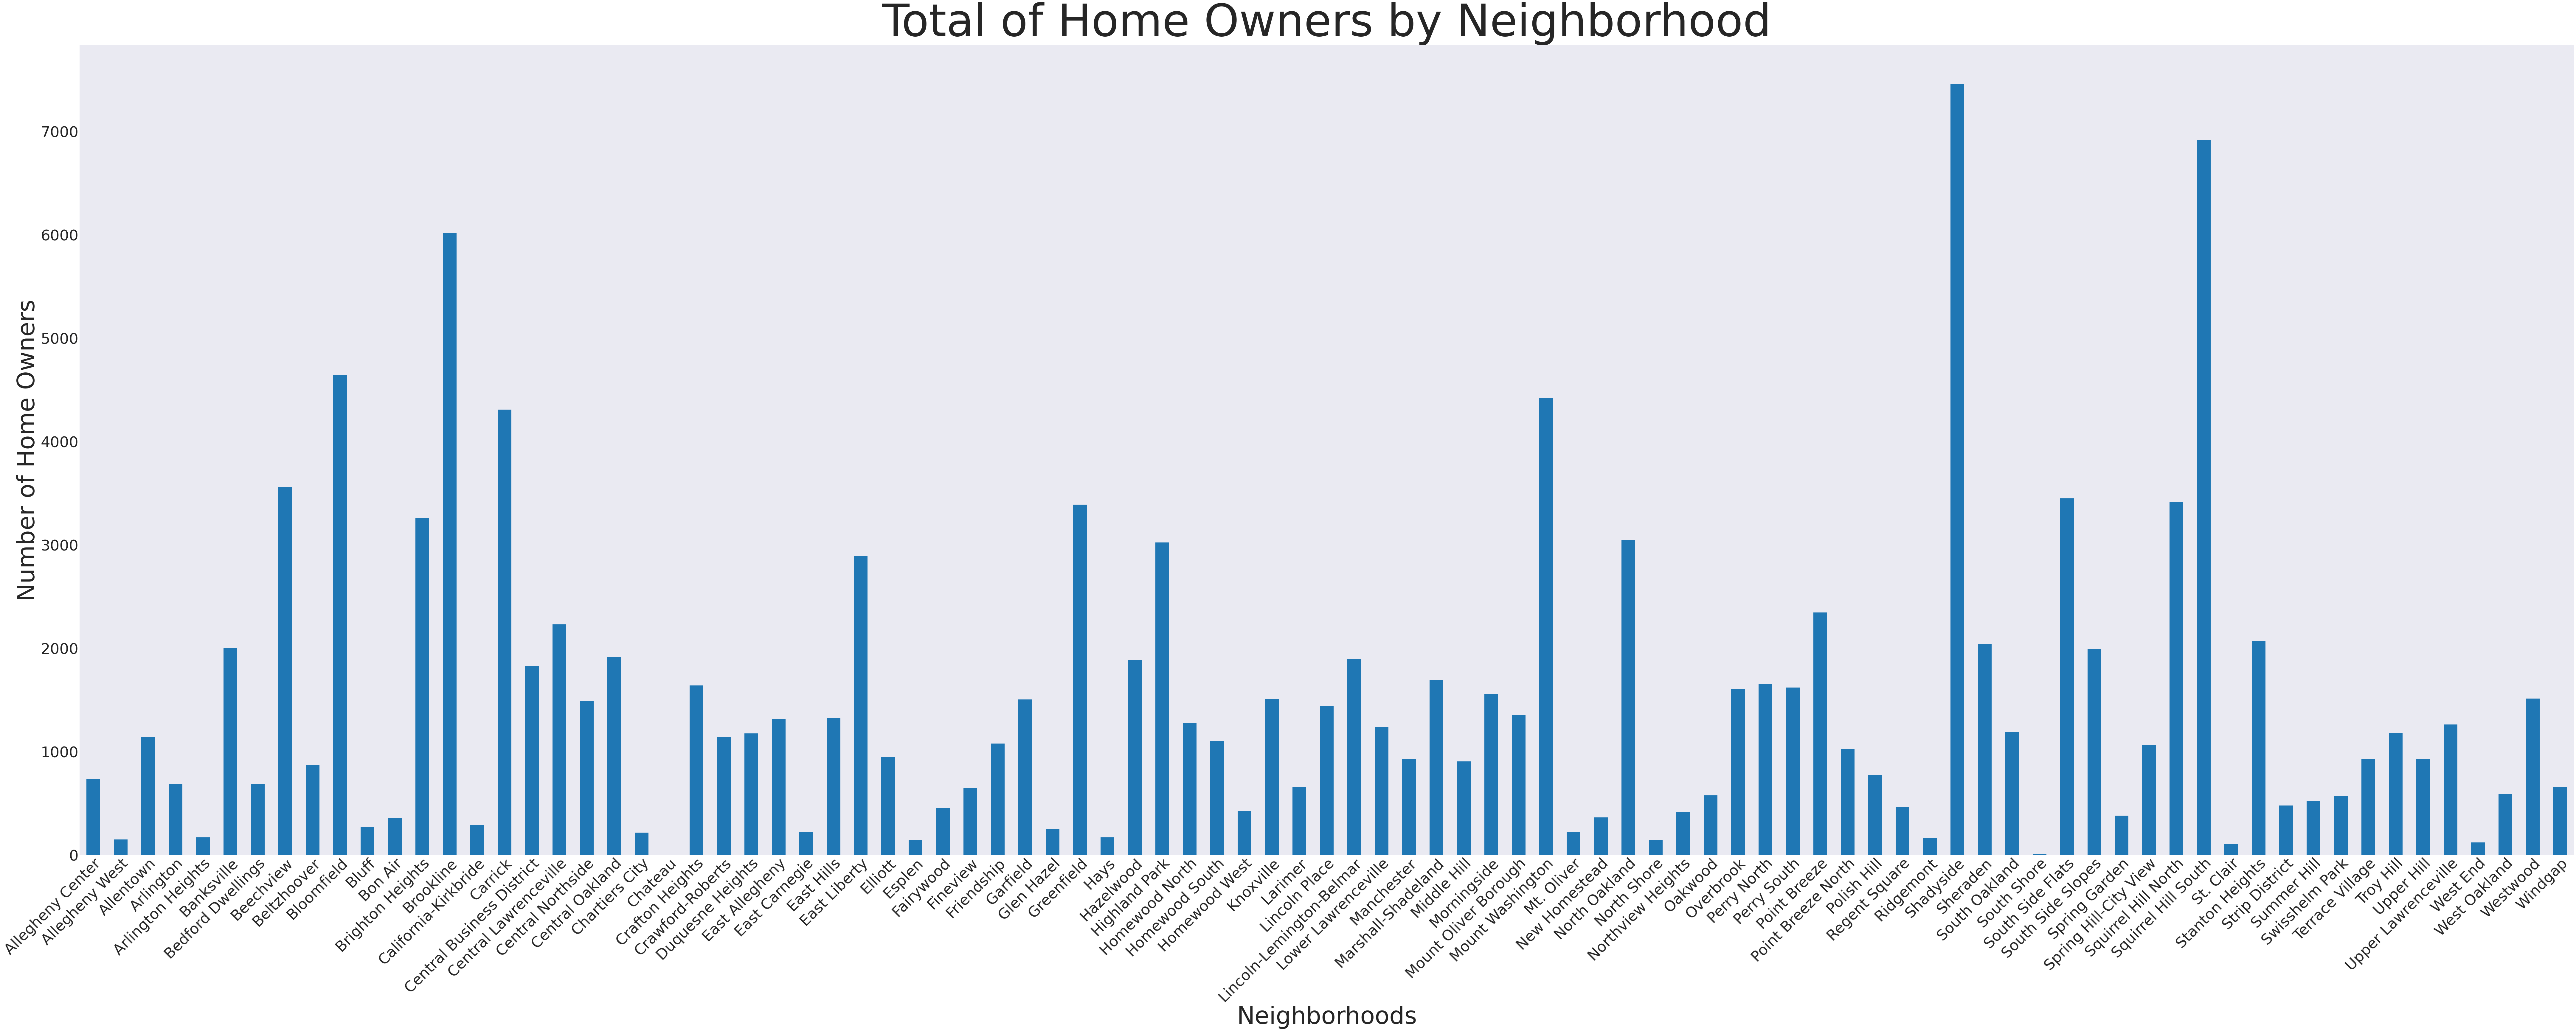

In [6]:
#Reading data & assigning a value
data = pd.read_csv("Housing.csv",index_col=1)
prices = pd.Series(data["Estimate; Total:"])

#Creating Visual
prices.plot.bar(figsize=(150,50))

#Adjusting Sizing, Adding Labels, & other customization
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor', fontsize = 50)
plt.yticks(fontsize = 50)
plt.style.use('seaborn-dark')

plt.title("Total of Home Owners by Neighborhood", fontsize = 150)
plt.xlabel("Neighborhoods", fontsize = 80)
plt.ylabel("Number of Home Owners", fontsize = 80)

**Process:** By organizing the data based on neighborhood and the total number of homeowners into a series, it was able to be organized into a bar chart for another side-by-side comparison. 

In [7]:
prices.sort_values()

Neighborhood
Chateau                   0.0
South Shore               8.0
St. Clair               104.0
West End                120.0
North Shore             141.0
                        ...  
Mount Washington       4425.0
Bloomfield             4640.0
Brookline              6017.0
Squirrel Hill South    6918.0
Shadyside              7462.0
Name: Estimate; Total:, Length: 91, dtype: float64

**Observations:** Based off this data visualization, Shadyside, Squirell Hill South, and Brookline have the largest nnumber of homeowners and Chateau, South Shore, and St.Clair have the least. This data is very similar to the population data visualization above in its outcomes. 

**Best Neighborhood Based off this data:** Shadyside

### **Combined Data Metric**

Text(0, 0.5, 'Arrests %')

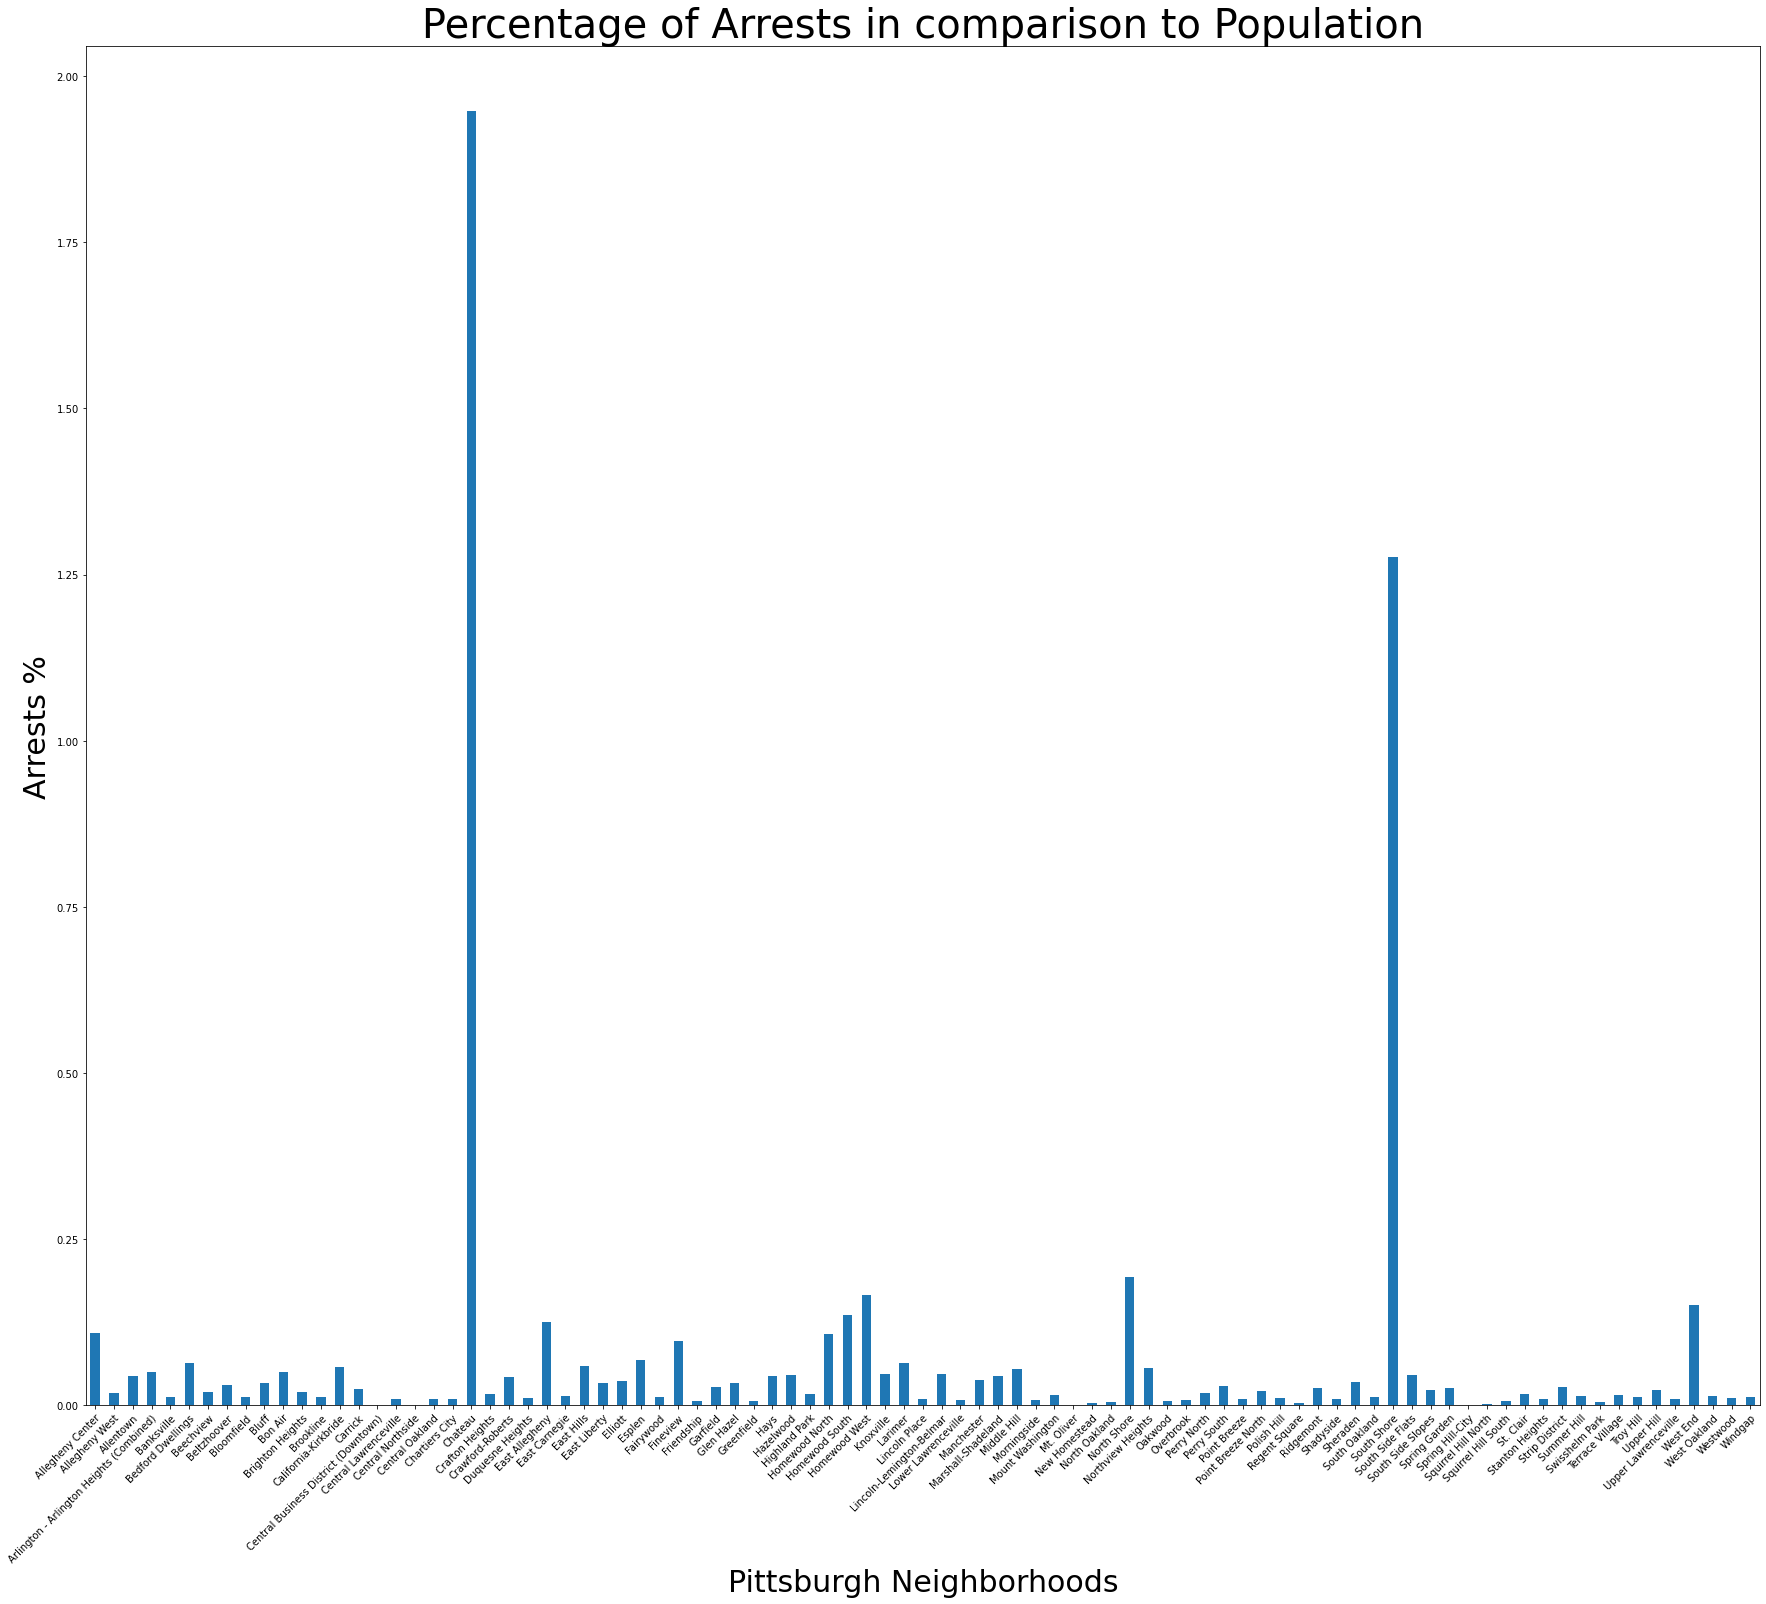

In [2]:
population_df = pd.read_csv("Neighborhood_Population.csv")
arrests_df = pd.read_csv("Arrests.csv")

#save the names of all the neighborhoods
neighborhood_names = []
for index, row in population_df.iterrows():
    name = row['Neighborhood']
    neighborhood_names.append(name)
    
#seperate the arest data so it is all 2020 arrests
querymask = arrests_df['ARRESTTIME'].str.contains('2020')
arrests = arrests_df[querymask]
groups = arrests.groupby(['INCIDENTNEIGHBORHOOD']).size()

#find the data connection between arrest and population, by dividing
count =0
pop_arrest = []
for index, row in population_df.iterrows():
    #get the two numbers
    pop1 = row["2020_Total_Population"]
    #combine Arrlington and Arlighton heights because they are combined in the population df
    if (count == 3):
        arrest1 = groups.get('Arlington', 0) + groups.get('Arlington Heights', 0)
    else:
        arrest = groups.get(neighborhood_names[count], 0)
    #divide owners by population of each and add it to the pop_price list
    arrestpop = arrest / pop1
    pop_arrest.append(arrestpop)
    #incriment the count
    count = count + 1
#create a series of the comparison
arrest_population = pd.Series(pop_arrest, index = neighborhood_names)

#Creating the graph
arrest_population.plot.bar(figsize=(30,25))

#Adjusting Sizing, Adding Labels, & other customization
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.style.use('seaborn-dark')
plt.title("Percentage of Arrests in comparison to Population", fontsize = 40)
plt.xlabel("Pittsburgh Neighborhoods", fontsize = 30)
plt.ylabel("Arrests %", fontsize = 30)

This bar graph represents the relationship between the population of a neighborhood and the amount of arrests taken place there. For majority of the neighborhoods, there is a less than 1% relationship between arrests and the population, meaning less than 1% of that neighborhoods population in 2020 were arrested. The amount of low percentages is a good thing, as it shows saftey, but it is not enough to determine the best neighborhood. In order to find the best neighborhood in Pittsburgh within this notebook, we will continue the analysis with the 20 neighborhoods with the lowest arrest percentage and compare that to the home ownership data.

In [15]:
#sort all of the percentages
sort_arrest_population = arrest_population.sort_values()
#only save the top 20
top_20 = sort_arrest_population[:20]
#print them out
print("These are the top 20 neighborhoods with the lowest arrest percentage:")
print(top_20)

These are the top 20 neighborhoods with the lowest arrest percentage:
Mt. Oliver                              0.000000
Spring Hill-City                        0.000000
Central Northside                       0.000000
Central Business District (Downtown)    0.000000
Squirrel Hill North                     0.002610
Regent Square                           0.003090
New Homestead                           0.003272
North Oakland                           0.005145
Swisshelm Park                          0.005228
Friendship                              0.006113
Squirrel Hill South                     0.006529
Oakwood                                 0.006829
Greenfield                              0.007162
Morningside                             0.007688
Lower Lawrenceville                     0.007952
Overbrook                               0.008039
Upper Lawrenceville                     0.008772
Shadyside                               0.008814
Central Oakland                         0.009254

Mt. Oliver                               221.0
New Homestead                            364.0
Regent Square                            467.0
Swisshelm Park                           570.0
Oakwood                                  576.0
Friendship                              1077.0
Lower Lawrenceville                     1241.0
Upper Lawrenceville                     1262.0
Central Northside                       1487.0
Morningside                             1557.0
Overbrook                               1602.0
Central Oakland                         1918.0
Central Lawrenceville                   2230.0
North Oakland                           3048.0
Greenfield                              3390.0
Squirrel Hill North                     3413.0
Squirrel Hill South                     6918.0
Shadyside                               7462.0
Central Business District (Downtown)       NaN
Spring Hill-City                           NaN
Name: Estimate; Total:, dtype: float64


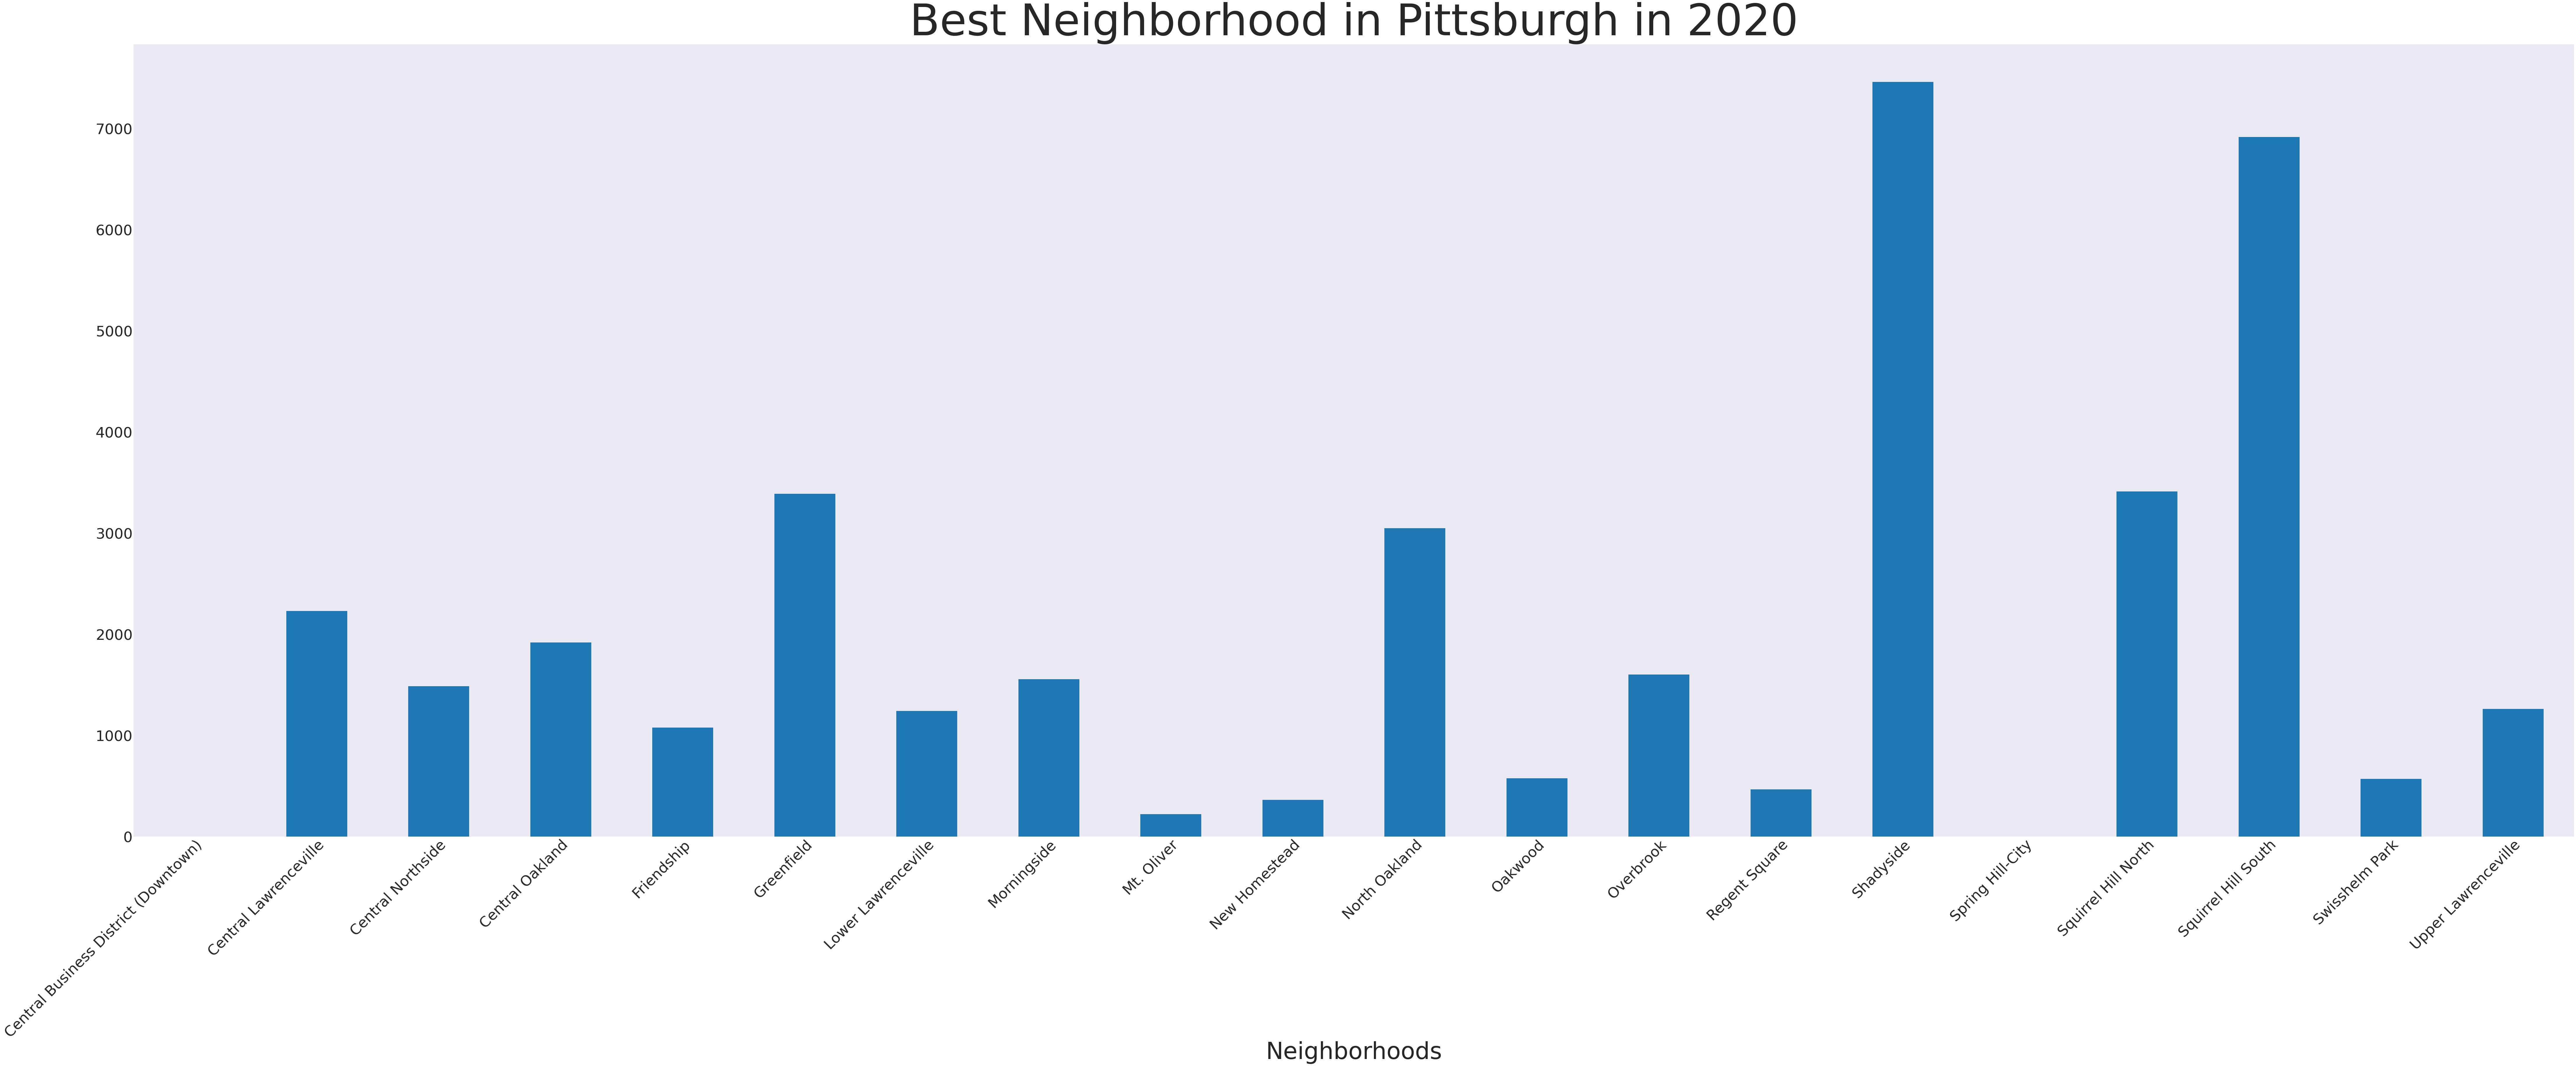

In [14]:
#import the dfs
owners_df = pd.read_csv("Housing.csv", index_col=1)
owners = pd.Series(owners_df["Estimate; Total:"])

#combine Arlington and Arrlington heights
owners['Arlington - Arlington Heights (Combined)'] = owners.loc[['Arlington', 'Arlington Heights']].sum()
owners.loc["Arlington - Arlington Heights (Combined)"] = owners.loc[['Arlington', 'Arlington Heights']].sum()
owners = pd.Series(owners, index = neighborhood_names)

#finter through the data based on the top 20 df
top_20_owners = owners[owners.index.isin(top_20.index)]

#plot the data in a bar chart
top_20_owners.plot.bar(figsize = (150, 50))

#change the xticks and yticks
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor', fontsize=50)
plt.yticks(fontsize = 50)
plt.style.use('seaborn-dark')

#add a title and labels to the graph
plt.title("Best Neighborhood in Pittsburgh in 2020", fontsize=150)
plt.xlabel("Neighborhoods", fontsize=80)

print(top_20_owners.sort_values())

This data uses the top 10 "safest" neighborhoods based on their arrested population percentage to determine which of these "safest" neighborhoods has the most home owners. The amount of homeowners is important, as the higher the number, the more people seem to like living in that neighborhood. Therfore, the neighborhood with the smallest percentage of arrested population when the count of arrests is divided by the total population but the highest number of homeowners, is the BEST neighboorhood in Pittsburgh. 

### **The Best Neighborhood**
From all the given data, we have determined Shadyside to be the best neighborhood!

![Will Ferrell Dancing GIF By Filmeditor](https://media.giphy.com/media/3ofT5HLxRglLyLFWCY/giphy.gif) 

### **Conclusion**

#### - Christine's Reflection
I am an out-of-state student so it's been a bit difficult to explore all the Pittsburgh neighborhoods, so my opinion on the best neighborhood is definitely biased. I actually find Lawrenceville to be nice because of it's many food options and its bowling alley, thus basing it of it's social community in a way, I consider it the best. In contrast, the metrics we used in our data, demonstrated Shadyside as the best, which I can neither agree or disagree with. I am yet to visit the area, but many people have told it has many entertainment/shopping options, so I believe it is probably rightfully so that Shadyside is determined the best. 

#### - Ciara's Reflection 

I am not from Pittsburgh and I have not visited all of the neighborhoods yet, so my veiw of "best" is skewed. Personally, I like the Strip District best because it is very walkable and I have always had a good time when I am there. The food options and entertianment options are really good there, so that is why I would consider the Strip District the "best" neighborhood. However, using the same metric we used in our code, I would not be able to determine what the best neighborhood to live in is because I have not been here long enough to know. I do think that ShadySide is the best neighborhood according to our metric. 